# Exercise 1.1

$\\a)X\,-some\,symptomes,\,Y\,-diagnose\,of\,according\,symptomes,\,data\,set\,-\,medical\,history,\,f\,-\,identification\,of\,the\,diagnose\\b)X\,-digits\,images,\,Y\,-type\,of\,digit,\,data\,set\,-\,image\,of\,digit\,with\,matching\,type\,of\,the\,digit,\,f\,-\,identification\,of\,the\,digit\\c)X\,-key\,words,\,Y\,-spam\,or\,not\,spam,\,data\,set\,-letters\,of\,spams\,and\,non\,spams\,with\,key\,words,\,f\,-\,determine\,spam\,or\,not\,spam\\d)X\,-price\,,temperature,\,day\,of\,the\,week\,Y\,-electric\,load,\,data\,set\,-electirc\,load\,values\,according\,with\,specific\,temperature\,price,\,day\,of\,the\,week\,f\,-\,identification\,of\,the\,value\,of\,electric\,load$

# Exercise 1.5
a) Learning approach - the problems is not well specified for design approach since it is complex to analaytically derive f without the need to see any data. However, applying large data of medical history, the age at which a particular medical test should be performed can be predicted by learning approach. 

b) Design approach - there is no need to use any data of prime numbers, since it is possible to classify number into primes and non primes by dividing this number on the number in range 1...sqrt(number)

c) Learning approach - applying the data of customers who was/was not captured in fraud in credit card charge, it is possible to make the model for fraud prediction of future customers

d) Design approach - easily, applying physics, the time can be analytically measured

e) Learning approach - taking the data of busy intersection, some pattern can be observerd (for example, in evenings, there is seen more busy intersections)

# Exercise 1.3

$\\a)y(t)w^T(t)x(t)<0\\Since\,x(t)\,is\,misclassified\,by\,w(t),\,sign(y(t))\,!=\,sign(w^T(t)x(t))\\b)Show\,that\,y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t)\\Since\,\,w(t+1)= w(t)+y(t)x(t)\\\,y(t)w^T(t+1)x(t)=y(t)(w(t)+y(t)x(t))^Tx(t)=y(t)w^T(t)x(t)+y(t)(y(t)x(t))^Tx(t)=y(t)w^T(t)x(t)+y(t)x(t)^Ty(t)^Tx(t)\\Since\,y(t)\,is\,just\,one\,value\,we\,can\,take\,out\,y(t)y^T(t)\,which\,equals\,to\,1\\𝑦(𝑡)𝑤^𝑇(𝑡+1)𝑥(𝑡)=y(t)w^T(t)x(t)+y(t)y(t)^T\,it\,is\,clear\,that\,y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t)\,since\,y(t)y(t)^T>0$

c)Applying the weight of next iteration $w(t+1)= (w(t)+y(t).x(t))$, the angle between the new weight and $x(t)$ will be changed in a way, that it will be closer or away from x. Since the angle will be changed in a right direction, the sign of dot product of $w^T(t+1)x(t)$ will be changed in a right direction (since it contains the $cos(a)$ where $a$ is the angle between vectors). 


In [1]:
import matplotlib.pyplot as plt
from sklearn import svm

In [47]:
import numpy as np

In [48]:
#generateData function which generate random data due to specific rows and columns
#param wNeend, by default, generates random weights 
def generateData(r, c, wNeed = True):
    x = np.random.rand(r, c)
    if wNeed:
        w = np.random.rand(c)
    x[:, 0] = np.ones(r)
    if wNeed == True:
        return x, w
    return x

X, W = generateData(21, 3)

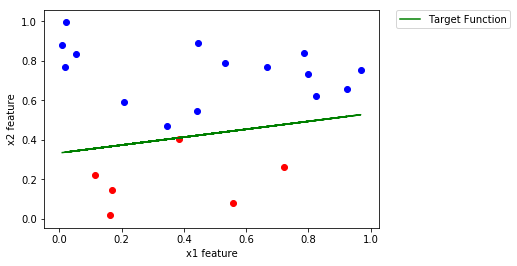

In [49]:
#The actual weights for the target function
realW = [0.5, 0.3, -1.5]

#predict function, computes the value of w^T x and takes the sign of it 
def predict(row, weights):
    activation = 0
    for i in range(len(row)):
        activation += weights[i] * row[i]
    return 1.0 if activation >= 0.0 else -1.0  

#the actual value of target function with given X
def targetValue(row):
    return 1.0 if row[1]*realW[1] + realW[2]*row[2] + realW[0] >= 0 else -1.0

#plotting the graph with given X, weights, color and label for the function
def plotGraph(x, w, color, label):  
    plt.plot(x[:, 1],(x[:,1]*w[1] + w[0])/((-1)*w[2]), color = color, label = label)
    

#plotting points with given params:
#x - dataSet, realW - actual weights of the target function, n - number of noisy data 
def plotPoints(x, realW, n = 0):
    for i in range(0,len(x)):
        if (realW[1]*x[i,1] + realW[2]*x[i,2] + realW[0] > 0):
            if (n > 0):
                n -= 1
                plt.scatter(x[i, 1], x[i,2], color = 'b')
            else:
                plt.scatter(x[i, 1], x[i,2], color = 'r')
        else:
            if (n > 0):
                n -= 1
                plt.scatter(x[i,1], x[i,2], color = 'r')
            else:
                plt.scatter(x[i, 1], x[i,2], color = 'b')
                
#function which changes weights to optimum ones with given data
def trainPLA(data, weights):
    #Number of updates before converging 
    nbc = 0
    while True:
        isTrained = True
        for r in data:
            if predict(r, weights) != targetValue(r):
                weights = weights + targetValue(r)*r
                isTrained = False
                nbc += 1
        if isTrained:
            break
    return weights, nbc


plt.xlabel('x1 feature')
plt.ylabel('x2 feature')
plotGraph(X, realW, 'g', "Target Function")
plotPoints(X, realW)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [50]:
# Function for plotting the final hypothesis and target function 
def compTargetHyp(X, realW, newW, nbc):
    plt.xlabel('x1 feature')
    plt.ylabel('x2 feature')
    plotPoints(X, realW)
    plotGraph(X, realW, 'g', "Target Function")
    plotGraph(X, newW, 'k', "Final Hypothesis")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    print("The number of updates needed for PLA to converge is ", nbc)
    

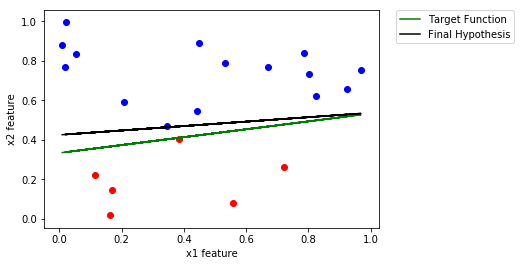

The number of updates needed for PLA to converge is  38


In [51]:
#Plotting the examples, the target function and final hypothesis in the same figure
#nbc stands for number before converging

newW, nbc = trainPLA(X, W)
compTargetHyp(X, realW, newW, nbc)

#Since, if the implementation of PLA algorithm is considered, the following can be recognized:
#There were the comparison of not the actual value of y but just its sign, thus
#for this classification problem, there are many possible weights can be generated
#Therefore f and g will not have exactly same weights, but g classifies the points in the same manner as f does


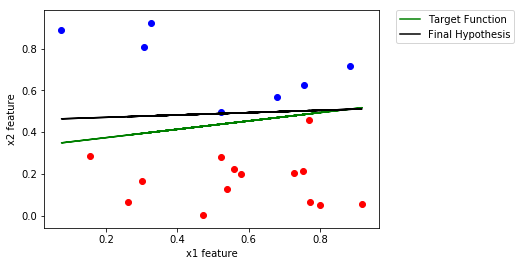

The number of updates needed for PLA to converge is  19


In [52]:
# Another randomly generated set of data of size 20.
X, W = generateData(21, 3)
# Running PLA for this dataSet
newW, nbc = trainPLA(X, W)
compTargetHyp(X, realW, newW, nbc)

#Compairing with previous results, the classification also works correctly with different data set of 20 elements

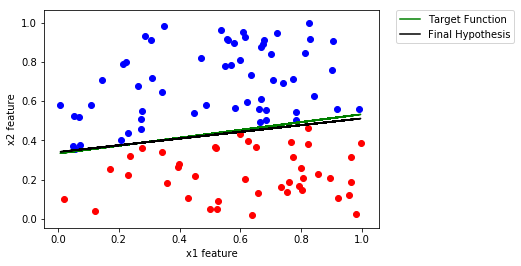

The number of updates needed for PLA to converge is  123


In [53]:
#randomly generated set of data of size 100.
X, W = generateData(101, 3)
newW, nbc = trainPLA(X, W)
compTargetHyp(X, realW, newW, nbc)

#Compairing with previous results, the classification works correctly with larger data set (100 elements)
#However since the data number was increased, the allignment of the functions became closer

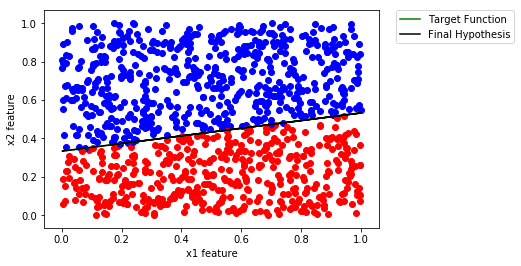

The number of updates needed for PLA to converge is  1354


In [54]:
#randomly generated set of data of size 1000
X, W = generateData(1001, 3)
newW, nbc = trainPLA(X, W)
compTargetHyp(X, realW, newW, nbc)

#Compairing with previous results, classifcation works correctly for 1000 elements
#There is seen even more allignment between functions due to the larger dataset

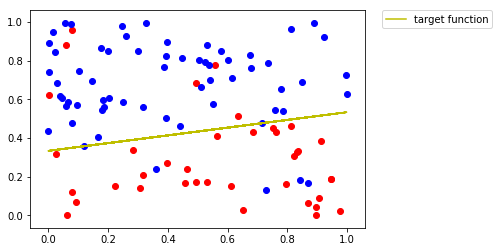

In [55]:
#Generate data with some noisy ones 

X, W = generateData(101, 3)
X_test = generateData(1001, 3, False)
plt.xlabel('x1 feature')
plt.ylabel('x2 feature')
plotPoints(X, realW, n = 10)
plotGraph(X, realW, 'y', "target function") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [56]:
#function for training pocket
#data - X values, weights - random weights
#iterNumber - number of updates before converging 
def trainPocket(data, weights, iterNumber):
    #optW - weights, from the pocket 
    allOptW = []
    allW = []
    optW = np.random.rand(3)
    errW = []
    errW_r = []
    globalError = 1
    index = 0
    while index < iterNumber:
        errorIn = 0
        for r in zip(data):
            if predict(r, weights) != targetValue(r):
                weights = weights + targetValue(r)*r
                isTrained = False
                errorIn += 1        
                
        errorIn /= np.size(data, 0)    
        
        allW.append(weights)
        
        if errorIn < globalError:
            globalError = errorIn
            optW = weights
            
        allOptW.append(optW)
            
        errW.append(errorIn)
        errW_r.append(globalError)
        
        index += 1
    
    return optW, errW, errW_r, allW, allOptW



In [57]:
# errW_r - error of best weights, errW - error of usual weights before the last iteration 
newW, errW, errW_r, allW, allOptW = trainPocket(X, W, 1000)

In [58]:
print(newW)

[  4.54350189   3.31179242 -14.42565111]


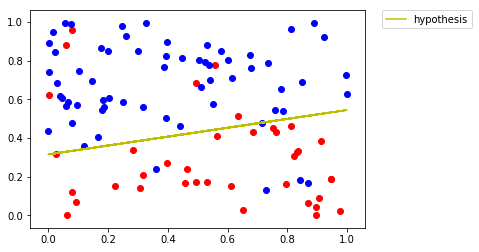

In [59]:
#Plotting the graph of hypothesis regarding to the data set 
plt.xlabel('x1 feature')
plt.ylabel('x2 feature')
plotPoints(X, realW, n = 10)
plotGraph(X, newW, 'y', "hypothesis") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

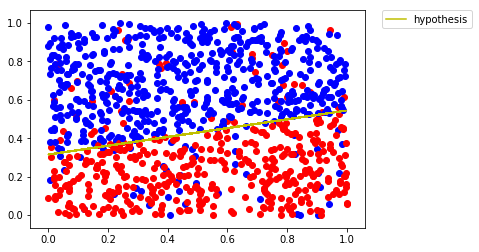

In [60]:
#Plotting the graph of hypothesis regarding to the test set
plt.xlabel('x1 feature')
plt.ylabel('x2 feature')
plotPoints(X_test, realW, n = 100)
plotGraph(X, newW, 'y', "hypothesis")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

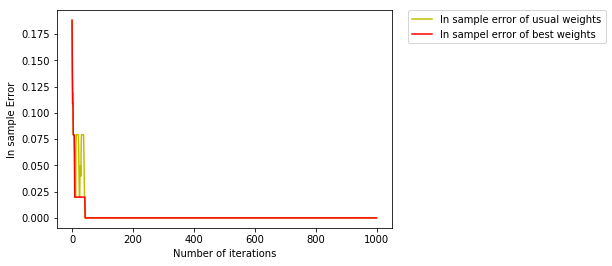

In [77]:
#Plotting the graph of errW and errW_r regarding to the number of iteratios, experiment was not repeated 
t = [x for x in range(1000)]
plt.ylabel('In sample Error')
plt.xlabel('Number of iterations')
plt.plot(t, errW, color = 'y', label = "In sample error of usual weights")
plt.plot(t, errW_r, color = 'r', label = "In sample error of best weights")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [72]:
def evaluateErr(x, weights):
    error = 0
    for r in x:
        if predict(r, weights) != targetValue(r):
            error += 1
    error /= np.size(x, 0)
    return error

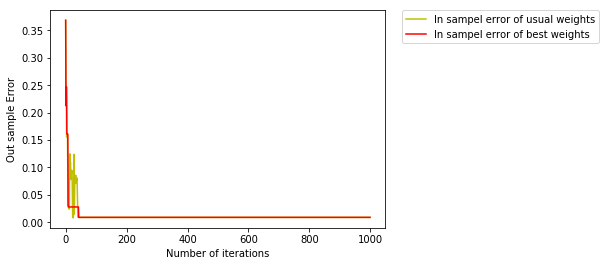

In [78]:
# Plotting Eout(w(t)), and Eout(w∗(t)) as functions of t (where Eout is estimated by the test set)

# Function which estimates out sample error of usual weights and best weights for each t and keeps them in two arrays
def errorTestSet(x):
    errOutW = []
    errOutW_r = []
    
    for weights in allW:
        errOutW.append(evaluateErr(x, weights))
    for weights in allOptW:
        errOutW_r.append(evaluateErr(x, weights))
        
    return errOutW, errOutW_r

errOutW, errOutW_r = errorTestSet(X_test)
plt.ylabel('Out sample Error')
plt.xlabel('Number of iterations')
plt.plot(t, errOutW, color = 'y', label = "In sample error of usual weights")
plt.plot(t, errOutW_r, color = 'r', label = "In sample error of best weights")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [74]:
#Function which takes average of errors after conducting the experiment by "number" times

def testPocket(number):
    avErrW = []
    avErrW_r = []
    
    for i in range(number):
        newW, errW, errW_r, allW, allW_r = trainPocket(X, W, 1000)
        
        if len(avErrW) == 0 and len(avErrW_r) == 0:
            avErrW = errW
            avErrW_r = errW_r
        else:
            avErrW = [x + y for x, y in zip(avErrW, errW)]
            avErrW_r = [x + y for x, y in zip(avErrW_r, errW_r)]
        
    avErrW = list(map(lambda x: x/number, avErrW))
    avErrW_r = list(map(lambda x: x/number, avErrW_r))
    
    return avErrW, avErrW_r
    

In [75]:
avErrW, avErrW_r = testPocket(20)


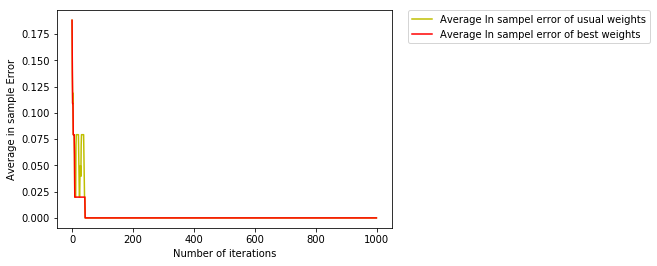

In [79]:
t = [x for x in range(1000)]
plt.ylabel('Average in sample Error')
plt.xlabel('Number of iterations')
plt.plot(t, avErrW, color = 'y', label = "Average In sample error of usual weights")
plt.plot(t, avErrW_r, color = 'r', label = "Average In sample error of best weights")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# It is seen that, average of in sample error of usual weights fluctuates much more than average error of best weights 
# This implies that pocket algorithm is more stable since it takes only best weights 